The goal of this project is to study the application of clustering models.

Let's load the data and examine the image.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage

In [ ]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image)
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [ ]:
path = 'image.jpg'
img = cv2.imread(path)

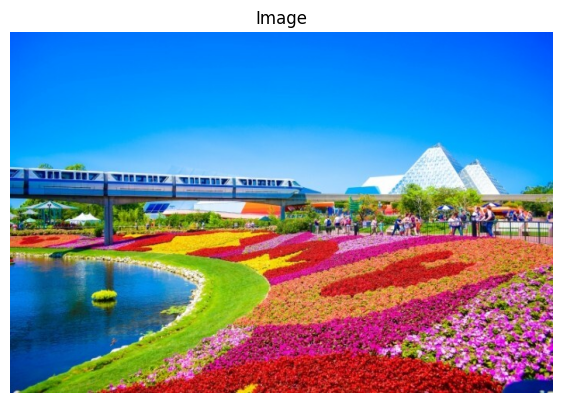

In [ ]:
draw_picture(img, 'Image')

Let's start with the KMeans clustering model. I will consider the number of clusters K=2,5,10,20.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
height, width, channels = img.shape
X = np.reshape(img, (height * width, channels)).astype(float)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clustered_img = kmeans.cluster_centers_[labels_clast].reshape(height, width, channels).astype(np.uint8)

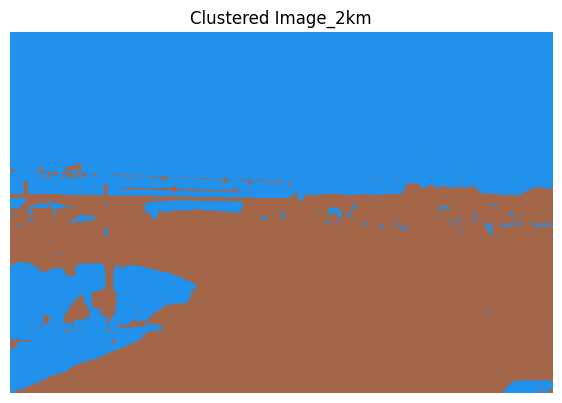

In [ ]:
draw_picture(clustered_img, "Clustered Image_2km")

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clustered_img_5km = kmeans.cluster_centers_[labels_clast].reshape(height, width, channels).astype(np.uint8)

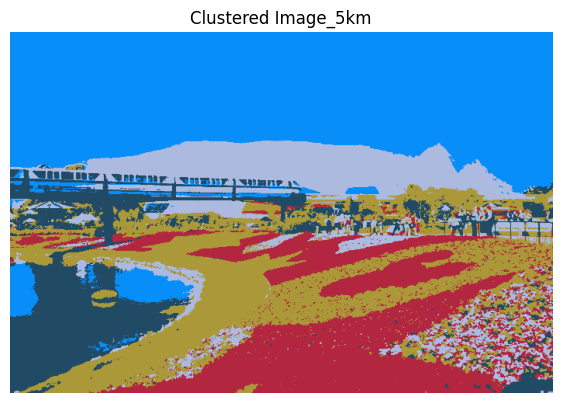

In [ ]:
draw_picture(clustered_img_5km, "Clustered Image_5km")

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clustered_img_10km = kmeans.cluster_centers_[labels_clast].reshape(height, width, channels).astype(np.uint8)

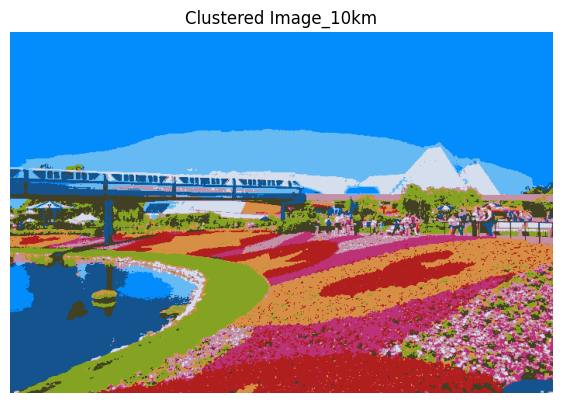

In [ ]:
draw_picture(clustered_img_10km, "Clustered Image_10km")

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clustered_img_20km = kmeans.cluster_centers_[labels_clast].reshape(height, width, channels).astype(np.uint8)

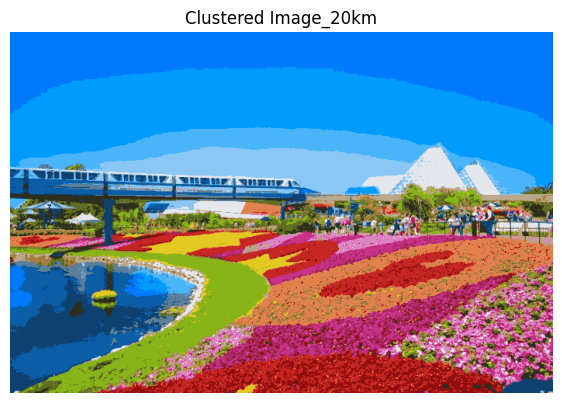

In [ ]:
draw_picture(clustered_img_20km, "Clustered Image_20km")

Let's implement DBSCAN.

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=2)
labels_clast_dbscan = dbscan.fit_predict(X)
labels_clast_dbscan = pd.Series(labels_clast_dbscan)

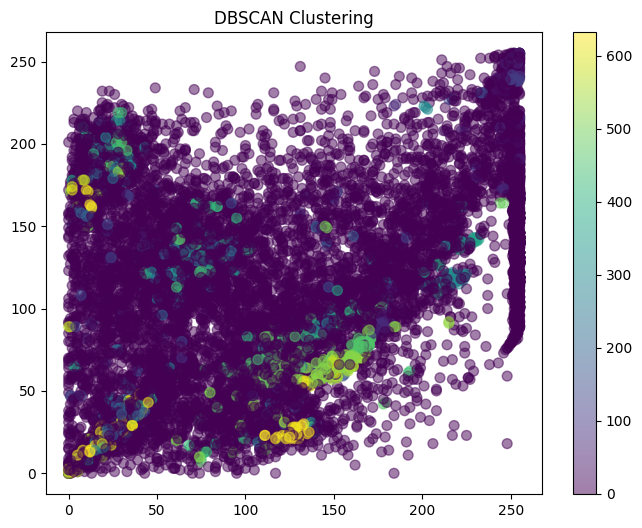

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_clast_dbscan, s=50, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.colorbar()
plt.show()

Now let's implement AgglomerativeClustering. I will consider the number of clusters K=2,5,10,20.

In [ ]:
img2 = cv2.resize(img, (128, 128))

In [ ]:
height, width, channels = img2.shape
X2 = np.reshape(img2, (height * width, channels)).astype(float)

In [ ]:
aggl = AgglomerativeClustering(n_clusters=2)
labels_clast_aggl = aggl.fit_predict(X2)

In [ ]:
def restore_image_from_labels(labels_clast_aggl, original_shape):
    restored_image = labels_clast_aggl.reshape(original_shape)
    return restored_image

In [ ]:
restored_img_aggl_2 = restore_image_from_labels(labels_clast_aggl, (height, width))


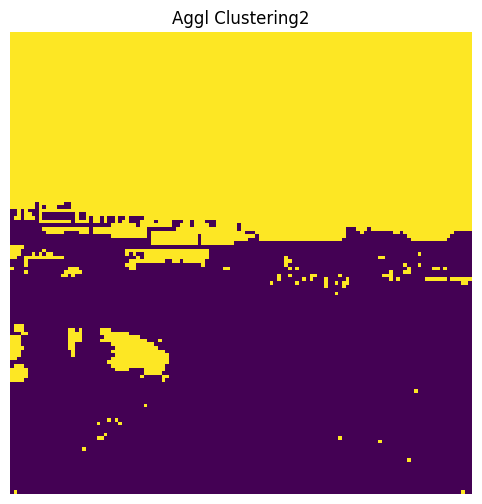

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(restored_img_aggl_2)
plt.axis('off')
plt.title('Aggl Clustering2')
plt.show()

In [ ]:
aggl5 = AgglomerativeClustering(n_clusters=5)
labels_clast_aggl = aggl5.fit_predict(X2)

In [ ]:
restored_img_aggl_5 = restore_image_from_labels(labels_clast_aggl, (height, width))

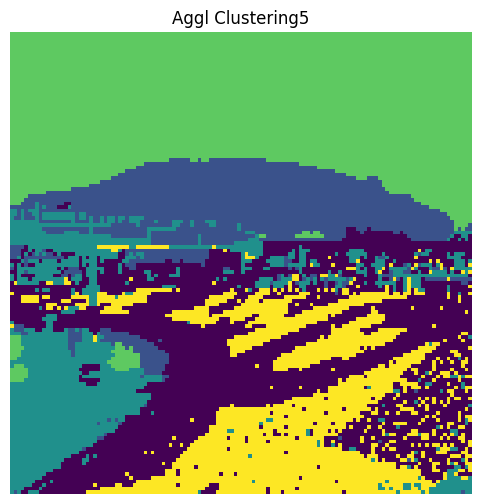

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(restored_img_aggl_5)
plt.axis('off')
plt.title('Aggl Clustering5')
plt.show()

In [ ]:
aggl10 = AgglomerativeClustering(n_clusters=10)
labels_clast_aggl_10 = aggl10.fit_predict(X2)

In [ ]:
restored_img_aggl_10 = restore_image_from_labels(labels_clast_aggl_10, (height, width))

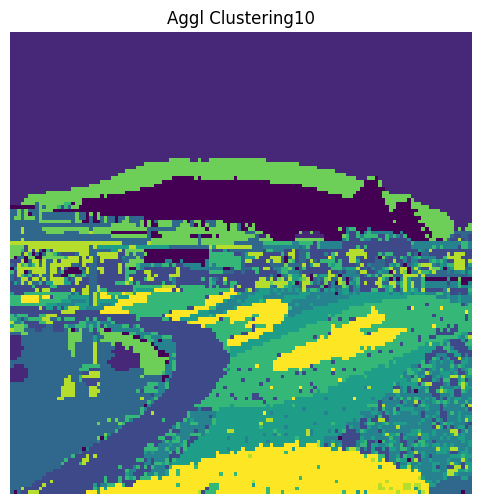

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(restored_img_aggl_10)
plt.axis('off')
plt.title('Aggl Clustering10')
plt.show()

In [ ]:
aggl20 = AgglomerativeClustering(n_clusters=20)
labels_clast_aggl_20 = aggl20.fit_predict(X2)

In [ ]:
restored_img_aggl_20 = restore_image_from_labels(labels_clast_aggl_20, (height, width))

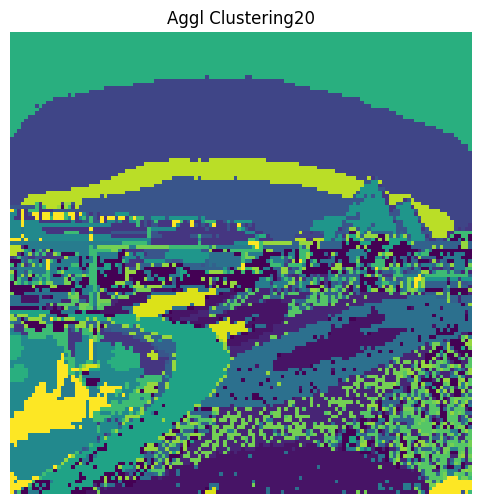

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(restored_img_aggl_20)
plt.axis('off')
plt.title('Aggl Clustering20')
plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
ssim_score_kmeans = ssim(img, clustered_img_20km, channel_axis=2)
ssim_score_kmeans

0.7823632897264009

It can be concluded that the KMeans model performed the best.